# Week 1

## Useful functions

In [355]:
from functions_week1_2 import *

# libraries to import
import numpy as np
import matplotlib.pyplot as plt

# Week 3

## Goals and Objectives

- The success probability of explore-then-commit algo, as a function of sub-optimality gap and exploration time. Of course, this is also averaged over 50-100 runs.

In [356]:
"""
    This function is a "lazy" implementation of the "Explore-Then-Commit" algorithm
    where we stop after the exploration phase for performance analysis.

    Inputs:

    num_arms: number of arms to pull
    exploration: number of times to explore each arm before committing to the best arm
    max_throws: maximum number of pulls allowed
    rwd: reward for a successful pull
    arm_probs: array of probabilities of success for each arm
    
    Outputs:

    results: array of shape (num_arms, max_throws) containing the results of each pull for each arm
    regrets: array of shape (max_throws,) containing the cumulative regret after each pull
    n_successes: array of shape (num_arms,) containing the number of successful pulls for each arm
    selected_best_arm: boolean indicating whether the best arm was selected during the commit phase.
"""
def explore_then_commit(num_arms, explorations, max_throws, rwd, arm_probs):

    # Initialize arrays to keep track of pulls, successes, results, regrets, and values
    n_pulls = np.zeros(num_arms, dtype=int)
    n_successes = np.zeros(num_arms, dtype=int)
    results = np.zeros((num_arms, max_throws), dtype=int)
    regrets = np.zeros(max_throws, dtype=float)
    selected_best_arm = 0
    best_arms_for_t_explorations = np.zeros(len(explorations), dtype= float)
    

    p_best = np.max(arm_probs)
    best_arm = np.argmax(arm_probs)

    max_exploration = np.max(explorations)
    explor_index = 0


    # No pull is made in the first round
    cumulative_regret = 0
    regrets[0] = cumulative_regret
    i = 0
    if explorations[0] == 0:
        choosen_arm = np.random.randint(num_arms)
        selected_best_arm = 1.000 if choosen_arm == best_arm else 0
        best_arms_for_t_explorations[explor_index] = 0
        explor_index += 1
    

    # Exploration phase for each arm
    i = 1
    while i <= max_exploration:
        for arm in range(num_arms):
            if i > max_exploration:
                break

            if np.random.rand() < arm_probs[arm]:
                n_successes[arm] += 1
                reward = rwd
            else:
                reward = 0

            results[arm, n_pulls[arm]] = reward
            cumulative_regret += p_best - arm_probs[arm]
            regrets[i] = cumulative_regret
            n_pulls[arm] += 1

            if ((i == explorations[explor_index])):
                if np.any(n_successes > 0):
                    choosen_arm = np.argmax(np.divide(n_successes, n_pulls, out=np.zeros_like(n_successes, dtype=float), where=n_pulls > 0))
                else:
                    choosen_arm = np.random.randint(num_arms)
                
                selected_best_arm = 1.000 if choosen_arm == best_arm else 0
                best_arms_for_t_explorations[explor_index] = selected_best_arm
                explor_index += 1
            
            i += 1

    # Commit phase
    if np.any(n_pulls > 0):
        choosen_arm = np.argmax(np.divide(n_successes, n_pulls, out=np.zeros_like(n_successes, dtype=float), where=n_pulls > 0))
    else:
        choosen_arm = np.random.randint(num_arms)
    
    if choosen_arm == best_arm:
        selected_best_arm = 1.000

    
    return results, regrets, n_successes, best_arms_for_t_explorations

### Function that runs the explore-then-commit algorithm nbr_runs times and returns the average succes rate of the algorithm.
- A success is when the best arm is chosen at the commit time.

In [357]:
"""
    Runs the explore then commit algorithm a given number of times and returns the percentage of times the 
    best arm was selected and the average regret over all runs.

    Inputs:
        num_arms: Number of arms.
        exploration: Exploration factor, between 0 and 1.
        max_throws: Maximum number of throws.
        rwd: Reward
        arm_probs (np.ndarray): True probabilities for each arm.
        nbr_runs: Number of times to run the algorithm.

    Returns:
        Tuple[float, np.ndarray]: 
        -Percentage of times the best arm was selected
        -Array of the average regret over all runs.
"""
def run_explore_then_commit(num_arms, exploration, max_throws, rwd, arm_probs, nbr_runs):
    
    # Initialize array to keep track of the number of times the best arm was selected
    selected_best_arms = np.zeros(len(exploration), dtype= float)

    # Initialize array to keep track of the regrets
    regrets = np.zeros(max_throws, dtype = float)
    
    # Run the explore then commit algorithm a given number of times
    for i in range(nbr_runs):
        _, regret, _, selected_best_arm = explore_then_commit(num_arms, exploration, max_throws, rwd, arm_probs)
        regrets += regret
        selected_best_arms += selected_best_arm

    # Return the percentage of times the best arm was selected and the average regret over all runs
    return np.divide(selected_best_arms, nbr_runs) , np.divide(regrets, nbr_runs)

### Function that plots the success rate as a function of the sub-optimality gap using the previous function.

In [358]:
"""
    Function that runs the 'run_explore_then_commit' function for a range of values of T_EXPLORATION and plots the array of 
    percentages as a function of T_EXPLORATION
    
    Inputs:

    num_arms : int
        The number of arms in the bandit problem
    t_explorations : numpy array
        The array of exploration values to try
    max_throws : int
        The maximum number of pulls allowed for each arm (>= num_arms * t_explorations)
    rwd : float
        The reward amount for each pull (1)
    arm_probs_list : list
        The list of  arm probability distributions for different gaps
    nbr_runs : int
        The number of runs to average over
    gaps : list
        The list of gaps to try
"""
def plot_explore_then_commit(num_arms, t_explorations, rwd, arm_probs_list, nbr_runs, gaps):
    
    max_throws = np.max(t_explorations) + 1

    # Initialize array to keep track of the success rates for each gap
    success_rate_list_collection = []

    # Initialize array to keep track of the failure rates for each gap
    failure_rate_list_collection = []

    # Initialize array to keep track of the average regret for each gap
    regrets_per_gap = []

    # Run the 'run_explore_then_commit' function for a range of values of T_EXPLORATION
    for i, arm_probs in enumerate(arm_probs_list):
        print("Gap: " + str(gaps[i]) + ", Probs: " + str(arm_probs))
        
        # Initialize array to keep track of the success rates for the value of t_exploration
        selected_best_arm_list = np.zeros(len(t_explorations), dtype=float)
        probabilies_not_bost_arm = np.ones(len(t_explorations), dtype=float)

        # Run the 'run_explore_then_commit' function for the value of t_exploration
        selected_best_arm_list, regrets = run_explore_then_commit(num_arms, t_explorations, max_throws, rwd, arm_probs, nbr_runs)
        selected_best_arm_list[0] = 1 / num_arms
        #print(selected_best_arm_list)
        regrets_per_gap.append(regrets)
        failure_rate_list_collection.append(probabilies_not_bost_arm - selected_best_arm_list)
        success_rate_list_collection.append(selected_best_arm_list)

    # Plot the array of percentages as a function of T_EXPLORATION
    for i in range(len(success_rate_list_collection)):
        plt.plot(t_explorations, success_rate_list_collection[i], label = "Gap: " + str(gaps[i]))
    plt.xlabel("T_EXPLORATION")
    plt.ylabel("P(best arm selected)")
    plt.grid()
    plt.title("P(best arm selected) as a function of the T_EXPLORATION")
    plt.legend()
    plt.show()

     # Plot the array of percentages as a function of T_EXPLORATION
    for i in range(len(success_rate_list_collection)):
        plt.plot(t_explorations, success_rate_list_collection[i], label = "Gap: " + str(gaps[i]))
    plt.xlabel("T_EXPLORATION")
    plt.ylabel("P(best arm selected)")
    plt.title("P(best arm selected) as a function of the T_EXPLORATION")
    plt.legend()
    # plot the x axis in log scale
    plt.xscale("log")
    plt.grid()
    plt.show()

    gap_index = 0
    # Plot the regret in a line graph
    x_axis=range(max_throws),     
    labels = ["Regret"]
    plt.plot(regrets_per_gap[gap_index])
    plt.legend(labels)
    plt.xlabel("Number of pulls")
    plt.ylabel("Cumulative Regret")
    plt.title("Cumulative Regret with Gap: " + str(gaps[gap_index]))
    plt.grid()
    plt.show()

    # Plot the array of percentages as a function of T_EXPLORATION
    for i in range(len(failure_rate_list_collection)):
        plt.plot(t_explorations, failure_rate_list_collection[i], label = "Gap: " + str(gaps[i]))
    plt.xlabel("T_EXPLORATION")
    plt.ylabel("P(NOT best arm selected)")
    plt.grid()
    plt.title("P(NOT best arm selected) as a function of the T_EXPLORATION")
    plt.legend()
    plt.show()



    

## Setup

In [359]:
#Initialisation of general parameters for the Explore then Commit strategy of the Multi-Armed Bandit problem

# Total number of arms
N_ARMS = 5

# exploration time
T_EXPLORATION = 5000

# divide T_exploration in 100 values and fill array of exploration times
T_EXPLORATION_ARRAY = np.linspace(0, T_EXPLORATION, 101, endpoint= True, dtype=int) 

# print the array of exploration times
print("Values of T_EXPLORATION: " + str(T_EXPLORATION_ARRAY))


# reward for a win
REWARD = 1

# sub-optimality gap
GAPS = [0.01, 0.02, 0.1, 0.2, 0.5]

# Array of list of arms Probabilities repartitions
array_probs = []

# Probability repartition with sub-optimality gap
for gap in GAPS:

    # probability of success for the second best arm as a random number between 0 and 0.5
    p_second_best = np.random.rand() * (1 - gap)

    # probability of success for the best arm
    p_best = p_second_best + gap

    # calculate the other arm probabilities as random between 0 and p_second_best
    probs = np.random.rand(N_ARMS - 2) * p_second_best

    # add the best and second best arm probabilities
    probs = np.append(probs, [p_best, p_second_best])

    # shuffle the probabilities and add them to the list
    np.random.shuffle(probs)
    array_probs.append(probs)





Values of T_EXPLORATION: [   0   50  100  150  200  250  300  350  400  450  500  550  600  650
  700  750  800  850  900  950 1000 1050 1100 1150 1200 1250 1300 1350
 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050
 2100 2150 2200 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750
 2800 2850 2900 2950 3000 3050 3100 3150 3200 3250 3300 3350 3400 3450
 3500 3550 3600 3650 3700 3750 3800 3850 3900 3950 4000 4050 4100 4150
 4200 4250 4300 4350 4400 4450 4500 4550 4600 4650 4700 4750 4800 4850
 4900 4950 5000]


Gap: 0.01, Probs: [0.19737486 0.680074   0.670074   0.34820122 0.41419609]
Gap: 0.02, Probs: [0.4192398  0.34438207 0.03999379 0.45716942 0.43716942]
Gap: 0.1, Probs: [0.64604311 0.74604311 0.58919032 0.00853068 0.64352309]
Gap: 0.2, Probs: [0.15169247 0.40435238 0.20435238 0.15410523 0.16891477]
Gap: 0.5, Probs: [0.22579634 0.14410865 0.1185295  0.18598425 0.72579634]


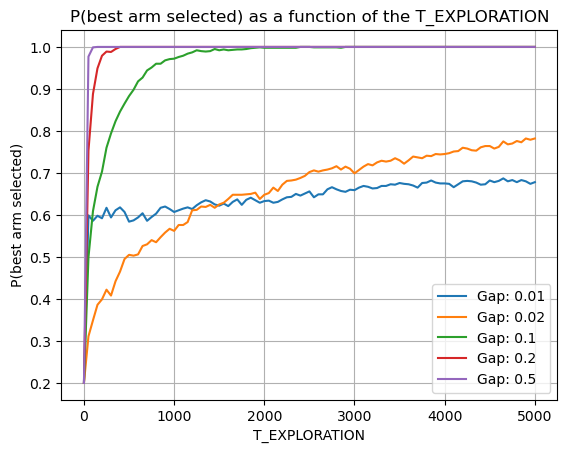

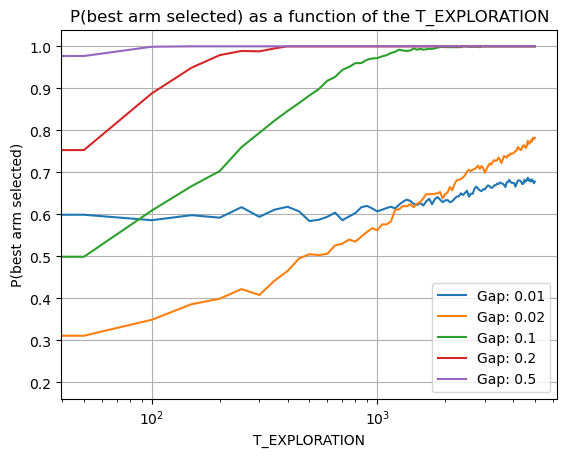

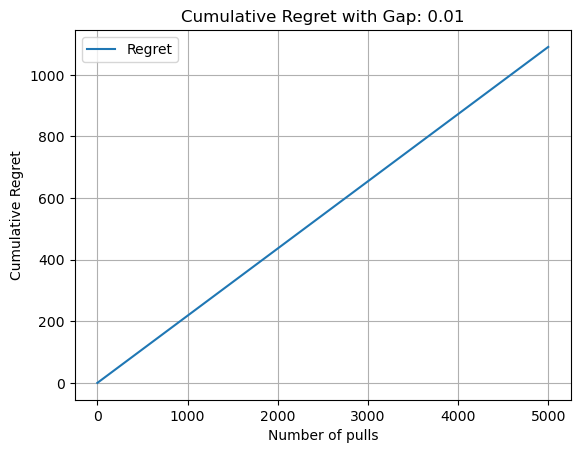

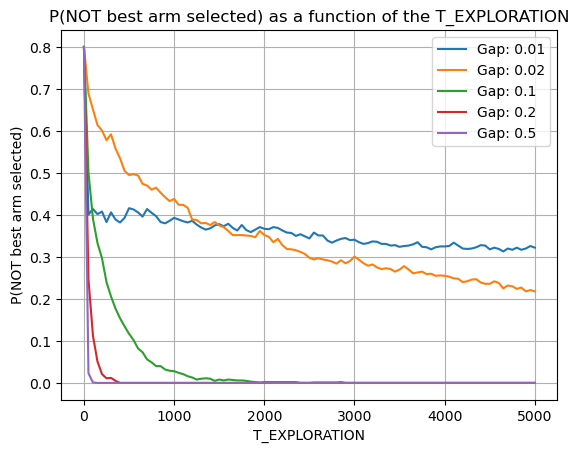

In [360]:
# Run the 'plot_explore_then_commit' function for 5 arms, 10000 throws, a reward of 1, and 100 runs

# simple T_EXPLORATION_ARRAY
TEST_EXPLORATION_ARRAY = [0, 1, 2, 5]

plot_explore_then_commit(N_ARMS, T_EXPLORATION_ARRAY, 1, array_probs, 1000, GAPS)

Plot 1: This plot shows the percentage of times the best arm was selected by the Explore Then Commit algorithm as a function of the number of pulls for different arm probability distributions. Each line represents a different distribution with a different gap between the best and second-best arms. As expected, the success rate increases with the number of pulls and the size of the gap, with the larger gaps achieving higher success rates more quickly. This increase looks exponential and this can also be seen in the logarithmic plot below.

Plot 2: This plot shows the same data as Plot 1 but with the x-axis scaled logarithmically. This allows us to better visualize the behavior of the algorithm for very large values of the number of pulls. Also as mentioned above, this could suggest that the relationship between the variables is logarithmic. In other words, as the x variable increases, the y variable increases at a decreasing rate, eventually approaching a maximum value.

Plot 3: We can see the cumulative regret for a gap of 0.01 as a function of the number of pulls. The cumulative regret is the sum of the regret at each time step. The regret is the difference between the best arm and the arm selected at each time step. As expected, the cumulative regret increases with the number of pulls. This is because the algorithm is exploring for a longer period of time and therefore selecting arms that are not the best arm more often.

Plot 4: This plot is simply the complement of the first plot in order to have a different look at the data.

Setup for two arms

Gap: 0.01, Probs: [0.6520501635024207, 0.6620501635024207]
Gap: 0.02, Probs: [0.15395283706099663, 0.17395283706099662]
Gap: 0.1, Probs: [0.3290196932041778, 0.42901969320417777]
Gap: 0.2, Probs: [0.4428713609616745, 0.6428713609616745]
Gap: 0.5, Probs: [0.6082884667852392, 0.10828846678523918]


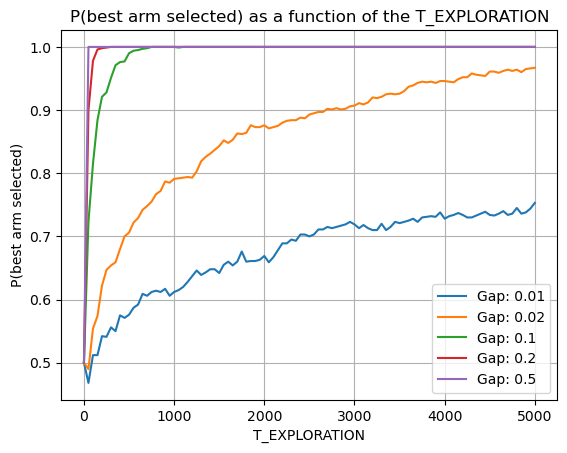

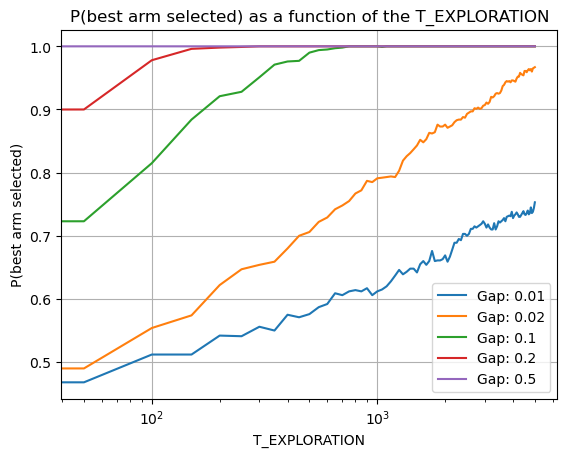

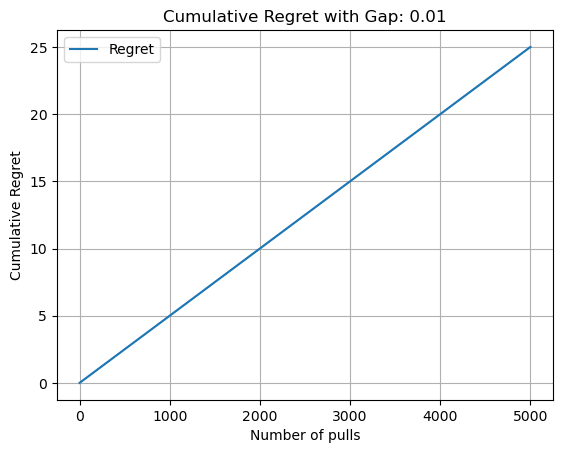

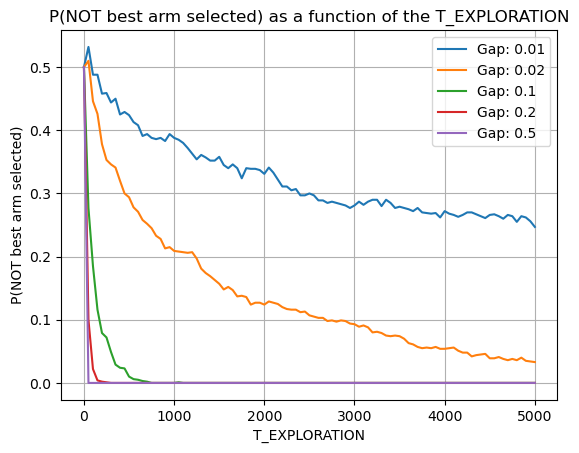

In [361]:
#Initialisation of general parameters for the Explore then Commit strategy of the Multi-Armed Bandit problem

# Total number of arms
N_ARMS = 2

# sub-optimality gap
GAPS = [0.01, 0.02, 0.1, 0.2, 0.5]

# Array of list of arms Probabilities repartitions
array_probs = []

# Probability repartition with sub-optimality gap
for gap in GAPS:

    # probability of success for the second best arm randomly chosen between 0 and 0.5
    p_second_best = np.random.rand() * (1 - gap)

    # probability of success for the best arm
    p_best = p_second_best + gap

    # add the best and second best arm probabilities
    probs = [p_best, p_second_best]

    # shuffle the probabilities and add them to the list
    np.random.shuffle(probs)
    array_probs.append(probs)

plot_explore_then_commit(N_ARMS, T_EXPLORATION_ARRAY, 1, array_probs, 1000, GAPS)


As we can see, changing the number of arms from 5 to 2 does not changes the overall behavior of the algorithm. The success rate increases with the number of pulls and the size of the gap, with the larger gaps achieving higher success rates more quickly. The cumulative regret also increases with the number of pulls and the size of the gap, with larger gaps resulting in higher regret.

## Thompson Sampling

In [362]:
"""
Thompson Sampling algorithm with beta distributions for a binary reward setting.

Inputs:
- num_arms: number of arms to choose from
- max_throws: maximum number of throws to simulate
- arm_probs: probability of success for each arm
- Output:
- regrets: array of regrets for each pull
- success_rate: number of times the best arm was selected divided by the number of pulls
"""
def thompson_sampling_beta(num_arms, explorations, arm_probs, max_throws):


    # Initialize beta distributions for each arm
    # a = number of successes + 1, b = number of failures + 1
    a = np.ones(num_arms)
    b = np.ones(num_arms)

    # Initialize variables to keep track of the regrets and the number of times the best arm is pulled
    regrets = np.zeros(max_throws, dtype= float)
    best_arms_for_t_explorations = np.zeros(len(explorations), dtype= float)
    best_arm = np.argmax(arm_probs)
    cumulative_regret = 0

    explor_index = 0
    if explorations[explor_index] == 0:
        best_arms_for_t_explorations[0] = 0
        regrets[0] = 0
        explor_index += 1


    i = 1
    max_exploration = np.max(explorations)
    while i <= max_exploration:
        if i > max_exploration:
            break

        # Sample from each beta distribution to get arm selections
        arm_samples = [np.random.beta(a[j], b[j]) for j in range(num_arms)]
        #arm_samples = arm_probs

        # Choose the arm with the highest sample
        chosen_arm = np.argmax(arm_samples)

        # Play the chosen arm and update the corresponding beta distribution
        reward = 1 if np.random.rand() < arm_probs[chosen_arm] else 0
        a[chosen_arm] += reward
        b[chosen_arm] += 1 - reward

        # Update the regrets
        cumulative_regret += arm_probs[best_arm] - arm_probs[chosen_arm]
        regrets[i] = cumulative_regret

        if (i == explorations[explor_index]):
            selected_arm = 1.000 if chosen_arm == best_arm else 0
            best_arms_for_t_explorations[explor_index] = selected_arm
            explor_index += 1

        i += 1

    # return the cumulative regrets and success rate
    return regrets, best_arms_for_t_explorations


### Function that runs the thompson sampling with Beta distribution nbr_runs times and returns the average succes rate of the algorithm.
- A success is when the best arm is chosen at the commit time.

In [363]:
"""
    Runs the Thompson Sampling algorithm with a beta distribution for a given number of arms, maximum number of throws,
    arm probabilities, and number of runs.

    Args:
    - num_arms: the number of arms
    - max_throws: the maximum number of throws
    - arm_probs: a list of floats representing the probabilities of each arm
    - nbr_runs: the number of times to run the algorithm

    Returns:
    - regrets: a numpy array representing the cumulative regrets for each pull of the algorithm
    - avg_success_rate: a float representing the average success rate over all runs
    """
def run_thompson_sampling_beta(num_arms, t_explorations, arm_probs, nbr_runs, max_throws):
    # Initialize array to keep track of the success rate and regrets
    success_rates = np.zeros(len(t_explorations), dtype= float)
    regrets = np.zeros(max_throws, dtype=float)

    # Run the Thompson Sampling algorithm a given number of times
    for i in range(nbr_runs):
        regret, successes = thompson_sampling_beta(num_arms, t_explorations, arm_probs, max_throws)
        # Save the results in the arrays
        success_rates += successes
        regrets += regret

    # Calculate the average regret and success rate over all runs

    return np.divide(regrets, nbr_runs), np.divide(success_rates, nbr_runs)

### Function that plots the success rate as a function of the sub-optimality gap using the previous function.

In [364]:
def plot_thompson_sampling_beta(num_arms, t_explorations, arm_probs_list, nbr_runs, gaps):
    max_throw = max(t_explorations) + 1

    # Initialize array to keep track of the success rates for each gap
    success_rate_per_gap = []

    # Initialize array to keep track of the failure rates for each gap
    failure_rate_per_gap = []

    # Initialize array to keep track of the average regret for each gap
    regrets_per_gap = []

    # Run the Thompson Sampling algorithm for each gap
    for i, arm_probs in enumerate(arm_probs_list):
        print(f"Gap: {gaps[i]}, Probs: {arm_probs}")
        # Initialize array to keep track of the success rate for each t_exploration
        selected_best_arm_list = np.zeros(len(t_explorations), dtype=float)

        regrets, selected_best_arm_list = run_thompson_sampling_beta(num_arms, t_explorations, arm_probs, nbr_runs, max_throw) 
        selected_best_arm_list[0] = 1 / num_arms
        regrets_per_gap.append(regrets)
        failure_rate_per_gap.append(1 - selected_best_arm_list)
        success_rate_per_gap.append(selected_best_arm_list)

    # Plot the array of percentages as a function of the number of pulls
    for i in range(len(gaps)):
        plt.plot(t_explorations, success_rate_per_gap[i], label = "Gap: " + str(gaps[i]))
    plt.xlabel("Number of pulls")
    plt.ylabel("P(best arm selected)")
    plt.grid()
    plt.title("P(best arm selected) as a function of the number of pulls")
    plt.legend()
    plt.show()

    # Plot the array of percentages as a function of the number of pulls
    for i in range(len(gaps)):
        plt.plot(t_explorations, success_rate_per_gap[i], label = "Gap: " + str(gaps[i]))
    plt.xlabel("Number of pulls")
    plt.ylabel("P(best arm selected)")
    plt.title("P(best arm selected) as a function of the number of pulls")
    plt.legend()
    # plot the x axis in log scale
    plt.xscale("log")
    plt.grid()
    plt.show()

    gap_index = 0
    # Plot the regret in a line graph
    x_axis=range(max_throw),     
    labels = ["Regret"]
    plt.plot(regrets_per_gap[gap_index])
    plt.legend(labels)
    plt.xlabel("Number of pulls")
    plt.ylabel("Cumulative Regret")
    plt.title("Cumulative Regret with Gap: " + str(gaps[gap_index]))
    plt.grid()
    plt.show()


    # Plot the array of percentages as a function of the number of pulls
    for i in range(len(gaps)):
        plt.plot(t_explorations, failure_rate_per_gap[i], label = "Gap: " + str(gaps[i]))
    plt.xlabel("Number of pulls")
    plt.ylabel("P(NOT best arm selected)")
    plt.grid()
    plt.title("P(NOT best arm selected) as a function of the number of pulls")
    plt.legend()
    plt.show()


### Setup

In [365]:
#Initialisation of general parameters for the Explore then Commit strategy of the Multi-Armed Bandit problem

# Total number of arms
N_ARMS = 5

# exploration time
MAX_THROW = 5000

# divide T_exploration in 100 values and fill array of exploration times
THROW_ARRAY = np.linspace(0, MAX_THROW, 101, endpoint= True, dtype=int) 

# print the array of exploration times
print("Values of THROW ARRAY: " + str(THROW_ARRAY))


# reward for a win
REWARD = 1

# sub-optimality gap
GAPS = [0.01, 0.02, 0.1, 0.2, 0.5]

# Array of list of arms Probabilities repartitions
array_probs = []

# Probability repartition with sub-optimality gap
for gap in GAPS:

    # probability of success for the second best arm as a random number between 0 and 0.5
    p_second_best = np.random.rand() * (1 - gap)

    # probability of success for the best arm
    p_best = p_second_best + gap

    # calculate the other arm probabilities as random between 0 and p_second_best
    probs = np.random.rand(N_ARMS - 2) * p_second_best

    # add the best and second best arm probabilities
    probs = np.append(probs, [p_best, p_second_best])

    # shuffle the probabilities and add them to the list
    np.random.shuffle(probs)
    array_probs.append(probs)


Values of THROW ARRAY: [   0   50  100  150  200  250  300  350  400  450  500  550  600  650
  700  750  800  850  900  950 1000 1050 1100 1150 1200 1250 1300 1350
 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050
 2100 2150 2200 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750
 2800 2850 2900 2950 3000 3050 3100 3150 3200 3250 3300 3350 3400 3450
 3500 3550 3600 3650 3700 3750 3800 3850 3900 3950 4000 4050 4100 4150
 4200 4250 4300 4350 4400 4450 4500 4550 4600 4650 4700 4750 4800 4850
 4900 4950 5000]


Gap: 0.01, Probs: [0.08357766 0.48901757 0.12837184 0.54489963 0.53489963]
Gap: 0.02, Probs: [0.08679411 0.01307277 0.4313802  0.35925378 0.4113802 ]
Gap: 0.1, Probs: [0.36718771 0.27877766 0.03334515 0.46718771 0.28488112]
Gap: 0.2, Probs: [0.9277061  0.20648511 0.07768739 0.15202149 0.7277061 ]
Gap: 0.5, Probs: [0.18641795 0.22849525 0.72849525 0.1543016  0.11248915]


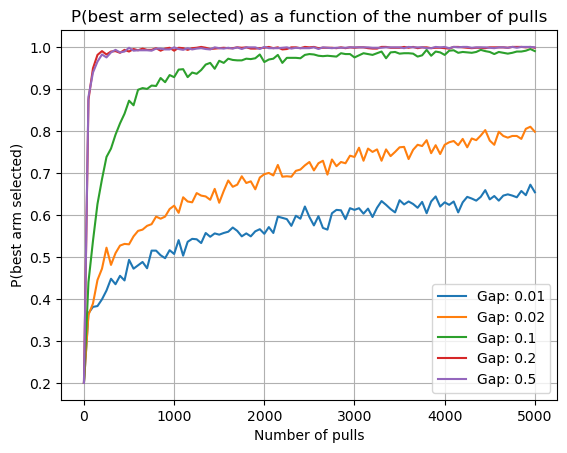

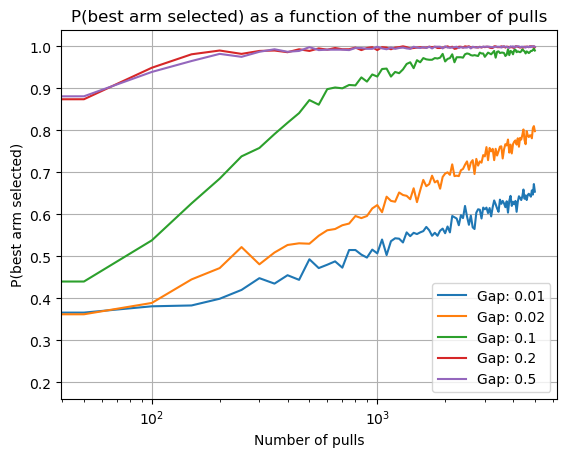

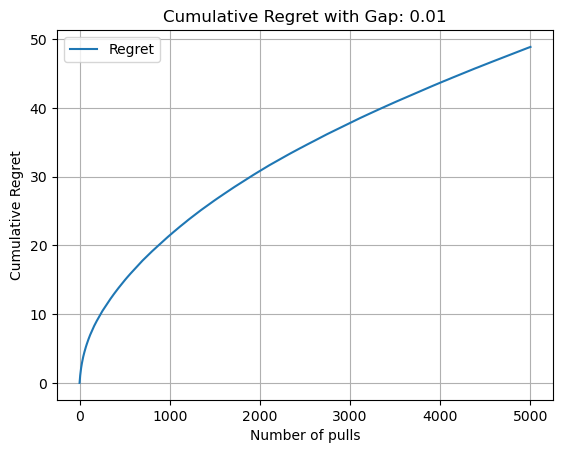

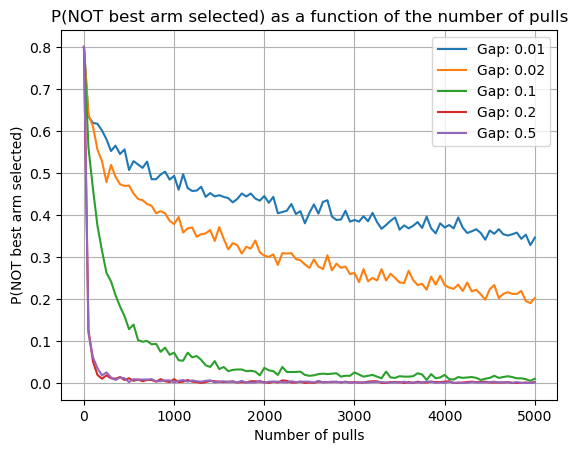

In [366]:
# Run the 'plot_explore_then_commit' function for 5 arms, 10000 throws, a reward of 1, and 100 runs

# simple T_EXPLORATION_ARRAY
TEST_ARRAY = [0, 1, 2, 5]

plot_thompson_sampling_beta(N_ARMS, THROW_ARRAY, array_probs, 1000, GAPS)

Plot 1: This plot shows the percentage of times the best arm was selected by the Thompson Sampling algorithm as a function of the number of pulls for different arm probability distributions. Each line represents a different distribution with a different gap between the best and second-best arms. As expected, the success rate increases with the number of pulls and the size of the gap, with the larger gaps achieving higher success rates more quickly. This increase looks exponential and this can also be seen in the logarithmic plot below.

Plot 2: This plot shows the same data as Plot 1 but with the x-axis scaled logarithmically. This allows us to better visualize the behavior of the algorithm for very large values of the number of pulls. Interestingly, we can see that for small gaps, the success rate continues to increase with the number of pulls even after the algorithm has already converged to the best arm. This suggests that for small gaps, the algorithm may be exploring more than necessary. Also as mentioned above, this could suggest that the relationship between the variables is logarithmic. In other words, as the x variable increases, the y variable increases at a decreasing rate, eventually approaching a maximum value.

Plot 3: This plot shows the same data as the pervious plots but with a log log scale. There are a few differences with the log-x scaled plots which may suggests that the increase may actually be something else than exponential. The relationship between the variables on both axes may be a power-law.

Plot 4: This plot is simply the complement of the first plot in order to have a different look at the data.